In [ ]:
suppressMessages(if(!require(car)) install.packages("car", repos = "http://cran.us.r-project.org"))
suppressMessages(if(!require(recipes)) install.packages("recipes", repos = "http://cran.us.r-project.org"))
suppressMessages(if(!require(caret)) install.packages("caret", repos = "http://cran.us.r-project.org"))
suppressMessages(if(!require(olsrr)) install.packages("olsrr", repos = "http://cran.us.r-project.org"))
suppressMessages(if(!require(fastDummies)) install.packages("fastDummies", repos = "http://cran.us.r-project.org"))                                 

# Cenário 1.

In [394]:
set.seed(544128)

n<-100; b0<-1.0; b1<-2.0

x<-cbind(rnorm(n,100,10));
erro<-rnorm(n)
dummy <- as.numeric(y==y[50])

y<-b0+b1*x+erro
y.dummy<-y+50*dummy


dados<-data.frame(y=y,x=x)
dados.cont<-data.frame(y=y.dummy,x=x)

summary(fit<-lm(y~x,data=dados)); summary(fit.cont<-lm(y~x,data=dados.cont))


Call:
lm(formula = y ~ x, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.82910 -0.75305 -0.00076  0.61585  2.30208 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.00251    1.05298   0.952    0.343    
x            2.00014    0.01038 192.654   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9632 on 98 degrees of freedom
Multiple R-squared:  0.9974,	Adjusted R-squared:  0.9973 
F-statistic: 3.712e+04 on 1 and 98 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ x, data = dados.cont)

Residuals:
   Min     1Q Median     3Q    Max 
-2.687 -1.268 -0.500  0.377 47.679 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.68175    5.41754   -0.68    0.498    
x            2.05147    0.05342   38.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.955 on 98 degrees of freedom
Multiple R-squared:  0.9377,	Adjusted R-squared:  0.9371 
F-statistic:  1475 on 1 and 98 DF,  p-value: < 2.2e-16


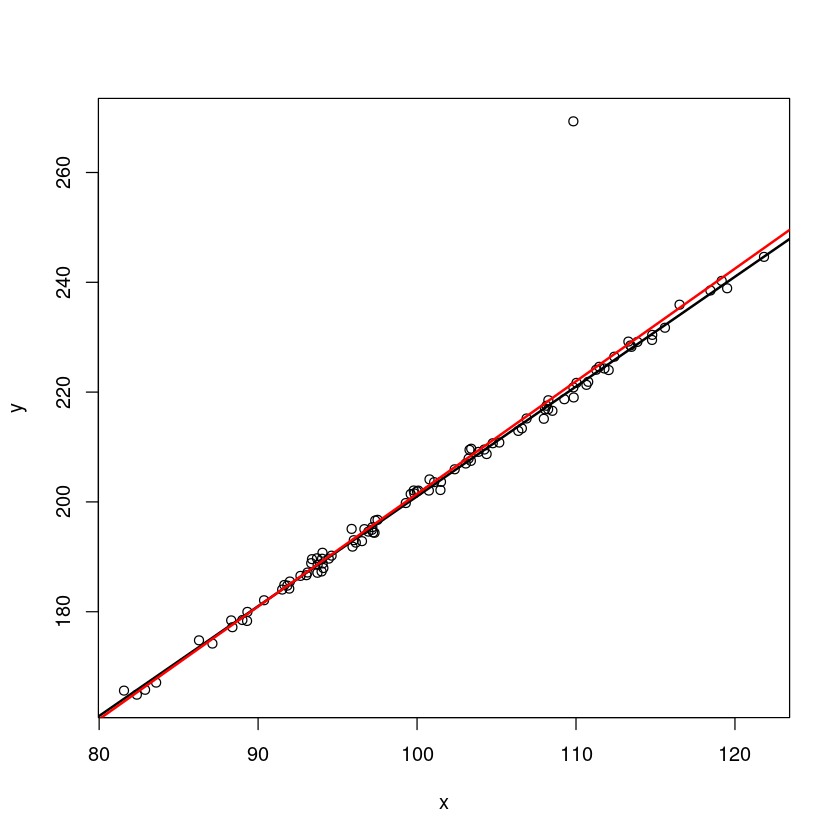

In [401]:
with(dados.cont,plot(x,y)); abline(fit, lwd=2); abline(fit.cont, lwd=2,col="red")

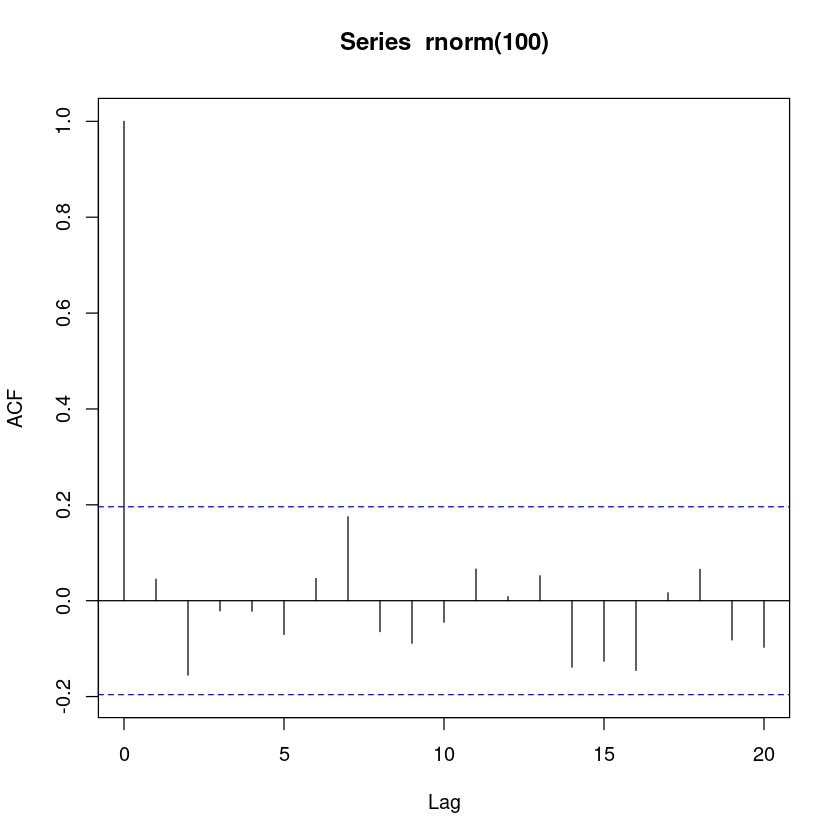

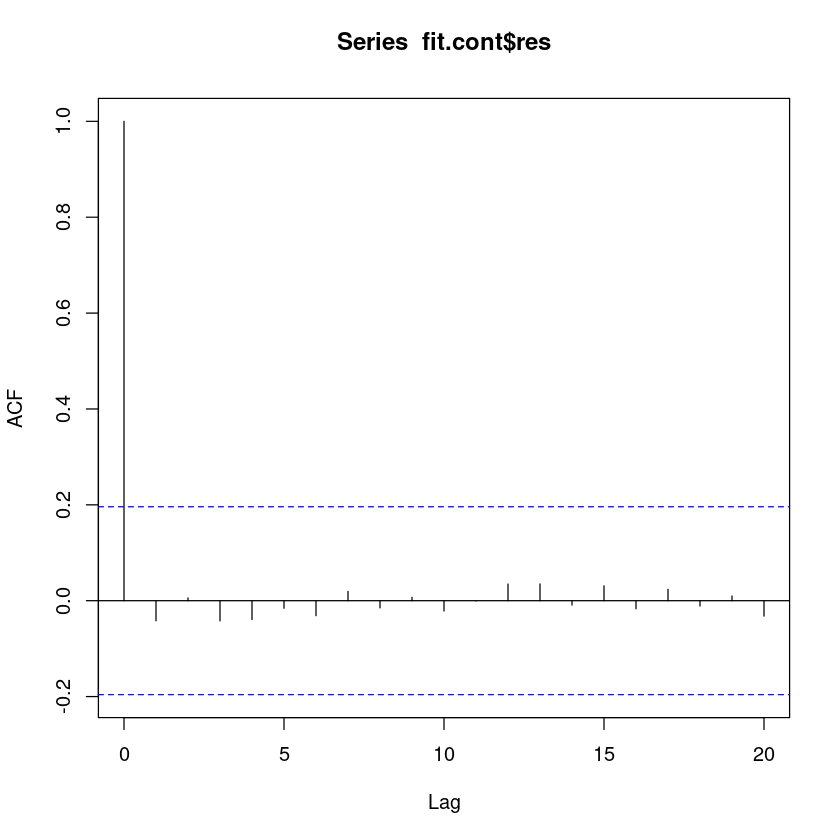

In [403]:
acf(fit$res);acf(fit.cont$res)

[1] 33 62

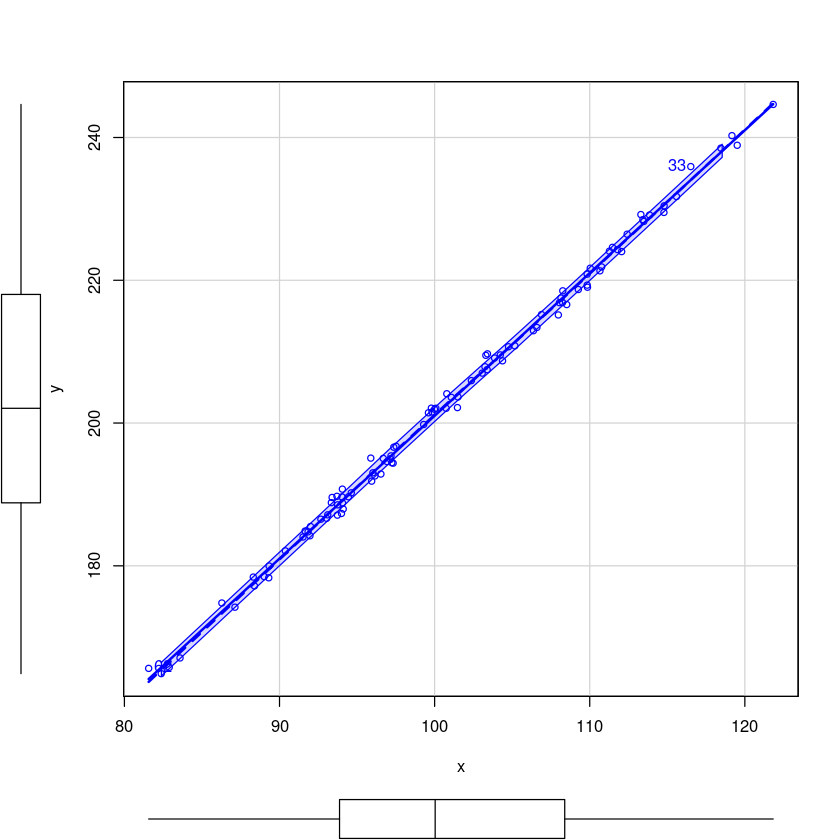

[1] 50 83

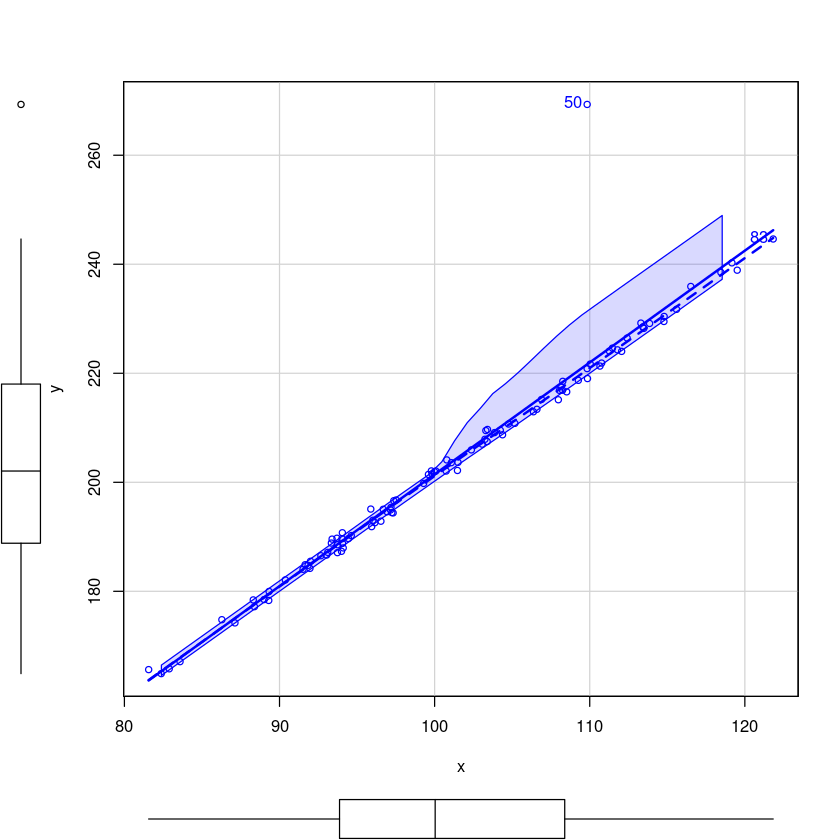

In [404]:
scatterplot(y ~ ., data=dados, id=list(n=2)); scatterplot(y ~ ., data=dados.cont, id=list(n=2))

In [405]:
car::outlierTest(fit); car::outlierTest(fit.cont)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
80 2.467547           0.015356           NA

   rstudent unadjusted p-value Bonferroni p
50 50.25572         2.9179e-71   2.9179e-69

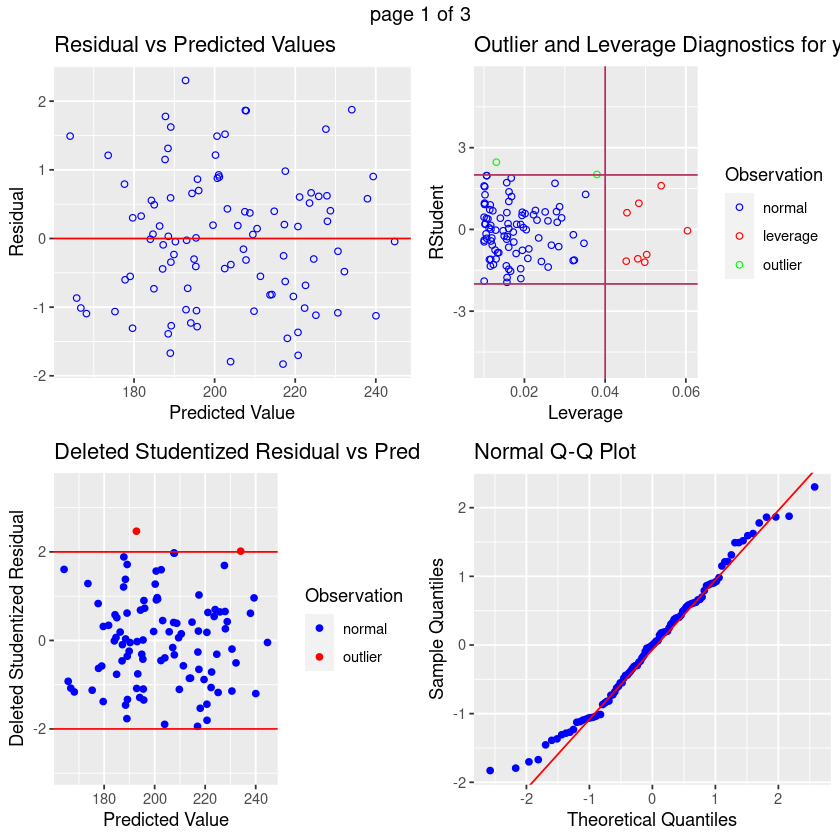

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL


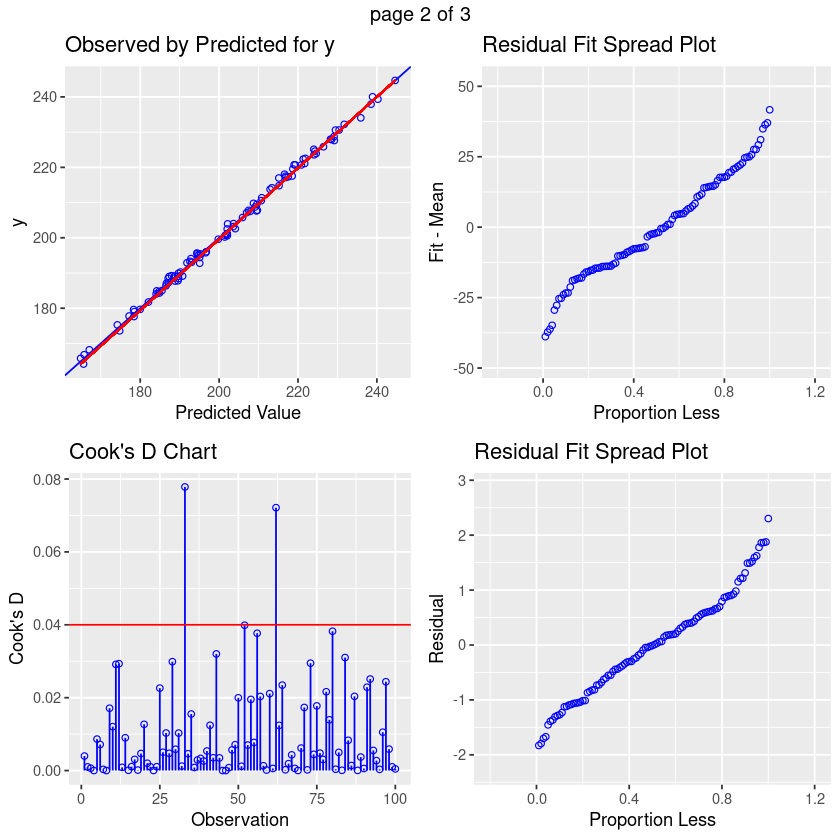

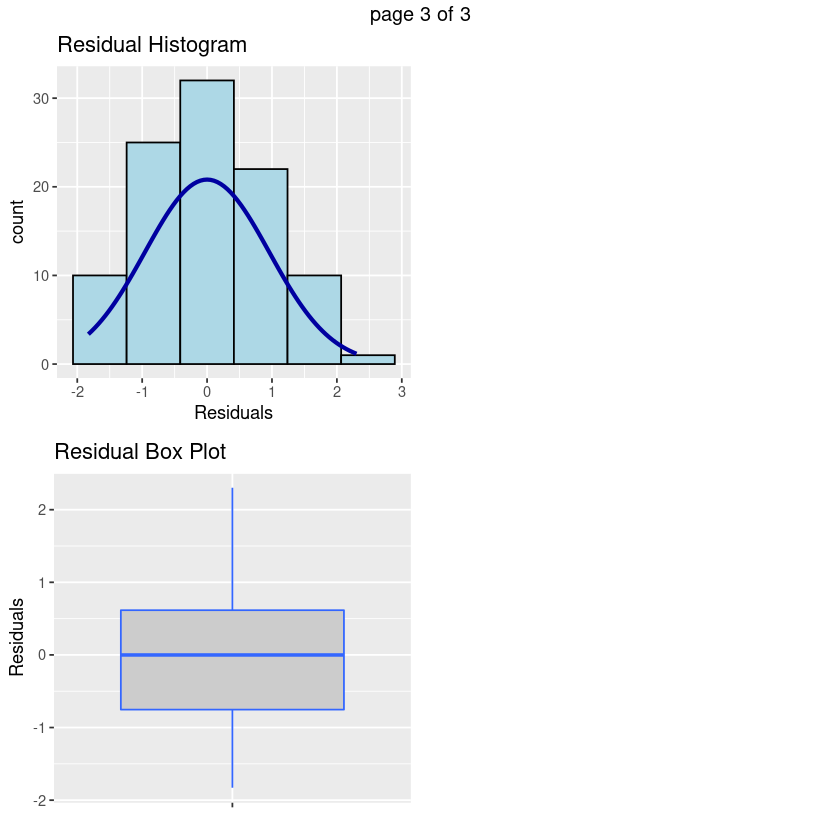

In [406]:
ols_plot_diagnostics(fit)

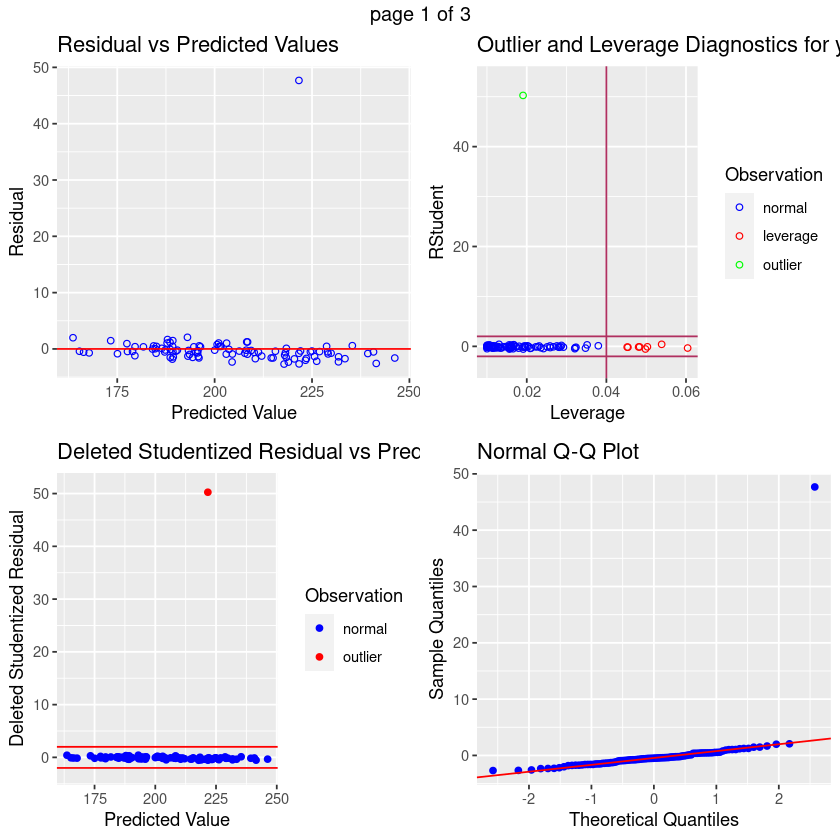

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL


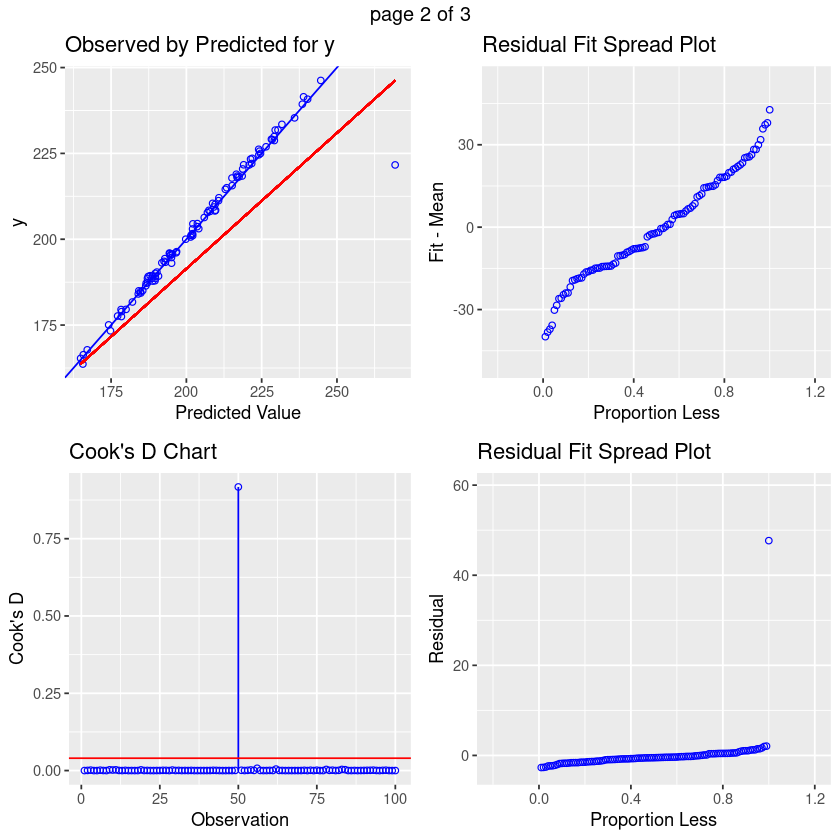

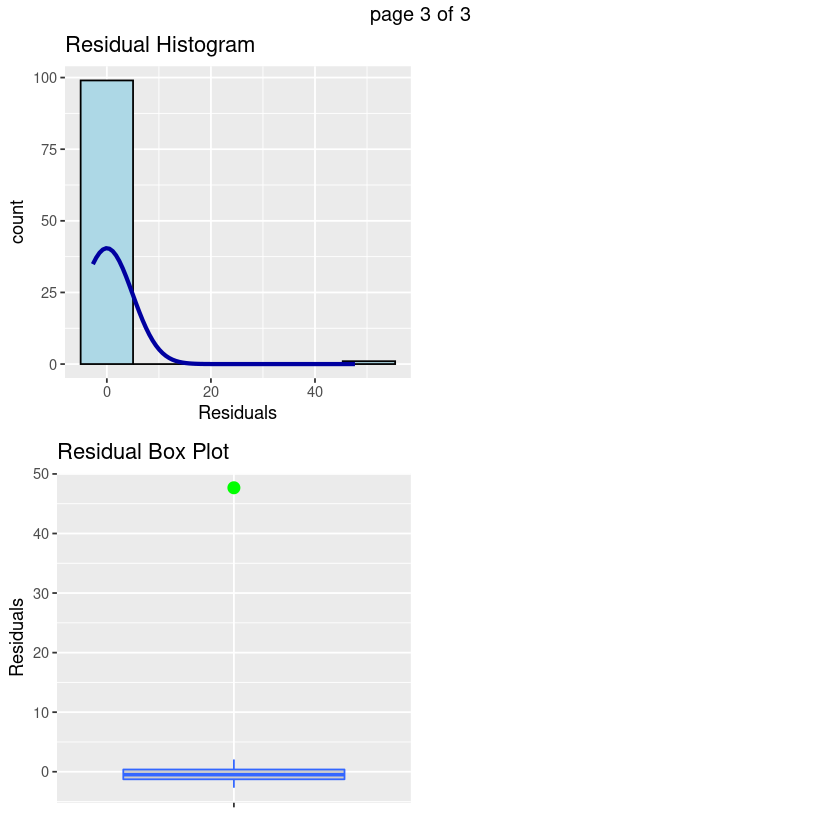

In [407]:
ols_plot_diagnostics(fit.cont)

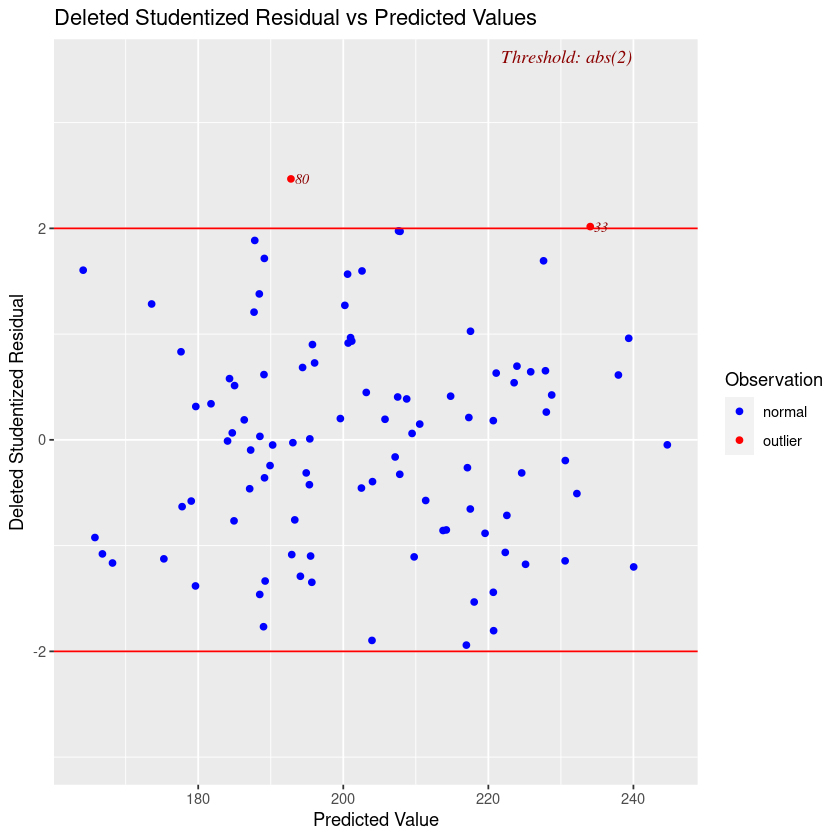

In [408]:
ols_plot_resid_stud_fit(fit)

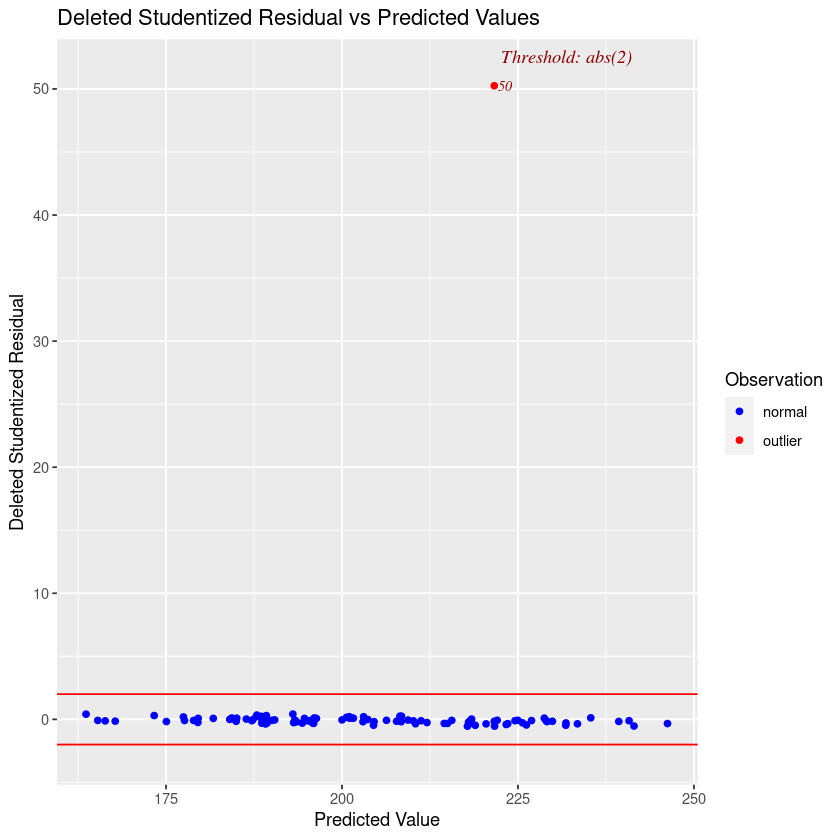

In [409]:
ols_plot_resid_stud_fit(fit.cont)

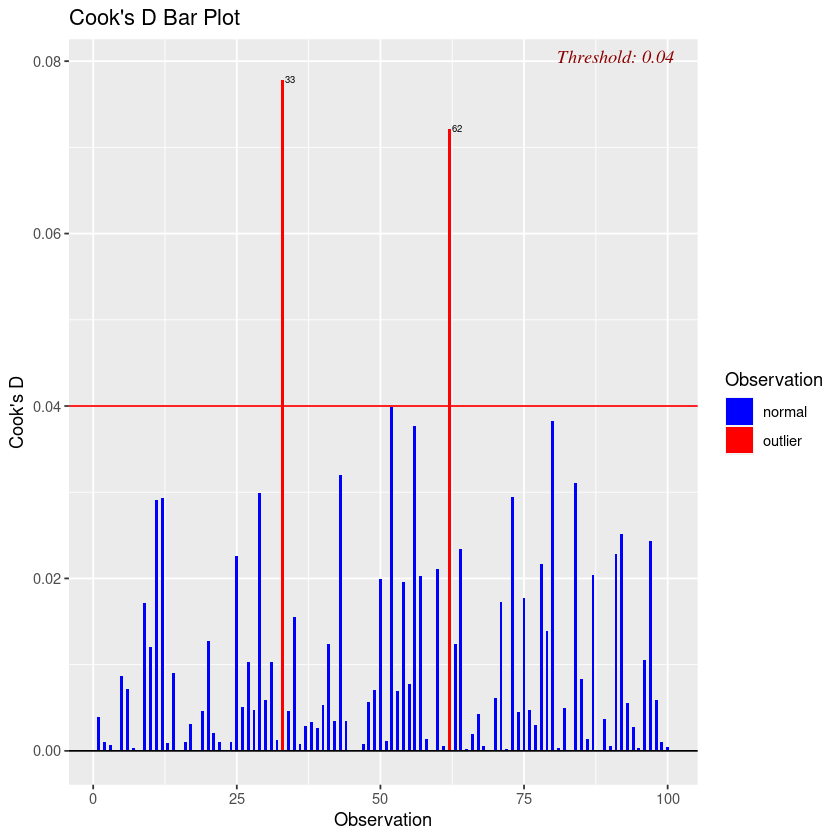

In [410]:
ols_plot_cooksd_bar(fit)

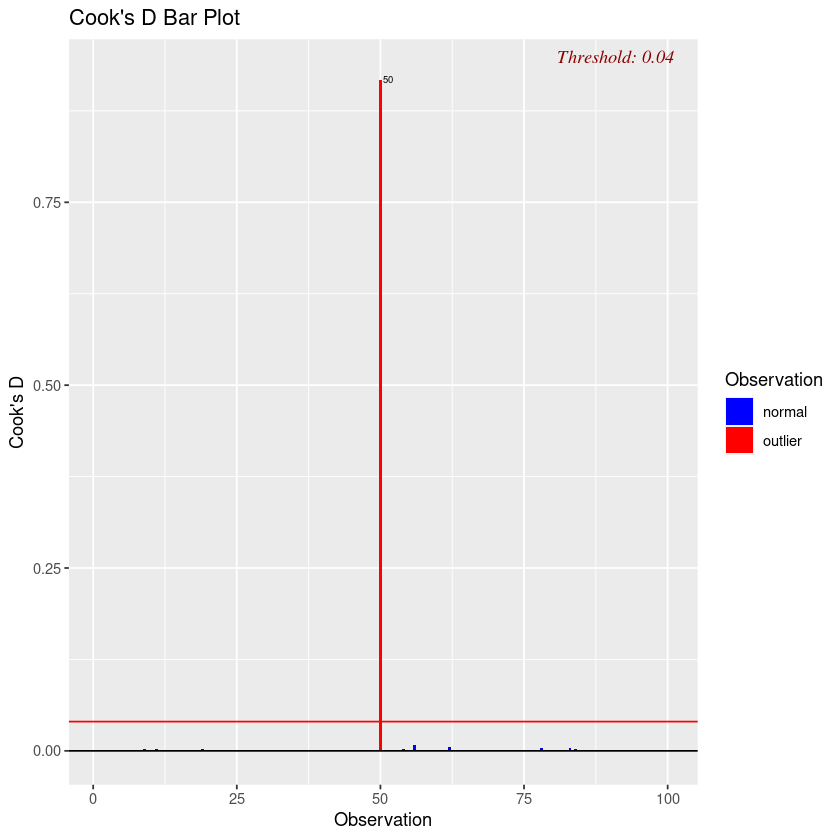

In [411]:
ols_plot_cooksd_bar(fit.cont)

[1] 80 33

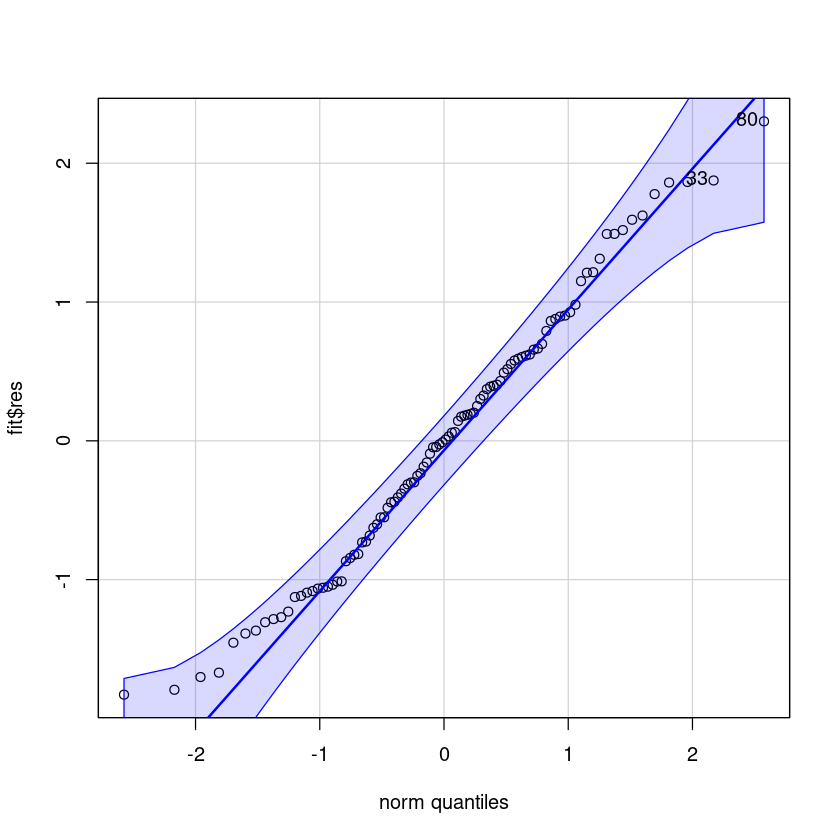

[1] 50 11

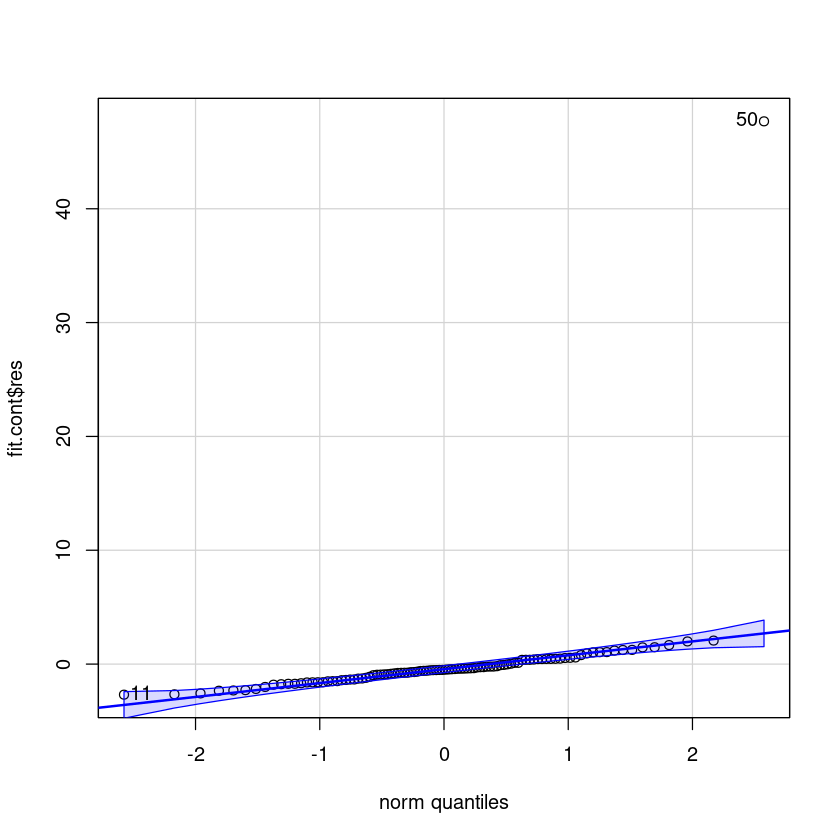

In [412]:
car::qqPlot(fit$res); car::qqPlot(fit.cont$res)

In [413]:
ols_test_breusch_pagan(fit.cont)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

            Data              
 -----------------------------
 Response : y 
 Variables: fitted values of y 

         Test Summary           
 -------------------------------
 DF            =    1 
 Chi2          =    42.17691 
 Prob > Chi2   =    8.337853e-11 

In [414]:
dummy

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [415]:
summary(fit.dummy<-lm(y~x+dummy,data=dados.cont))


Call:
lm(formula = y ~ x + dummy, data = dados.cont)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85303 -0.73289  0.00021  0.58834  2.29546 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.87191    1.05115   0.829    0.409    
x            2.00157    0.01037 192.958   <2e-16 ***
dummy       48.60594    0.96717  50.256   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9579 on 97 degrees of freedom
Multiple R-squared:  0.9977,	Adjusted R-squared:  0.9976 
F-statistic: 2.1e+04 on 2 and 97 DF,  p-value: < 2.2e-16


Warning message:
“not plotting observations with leverage one:
  50”


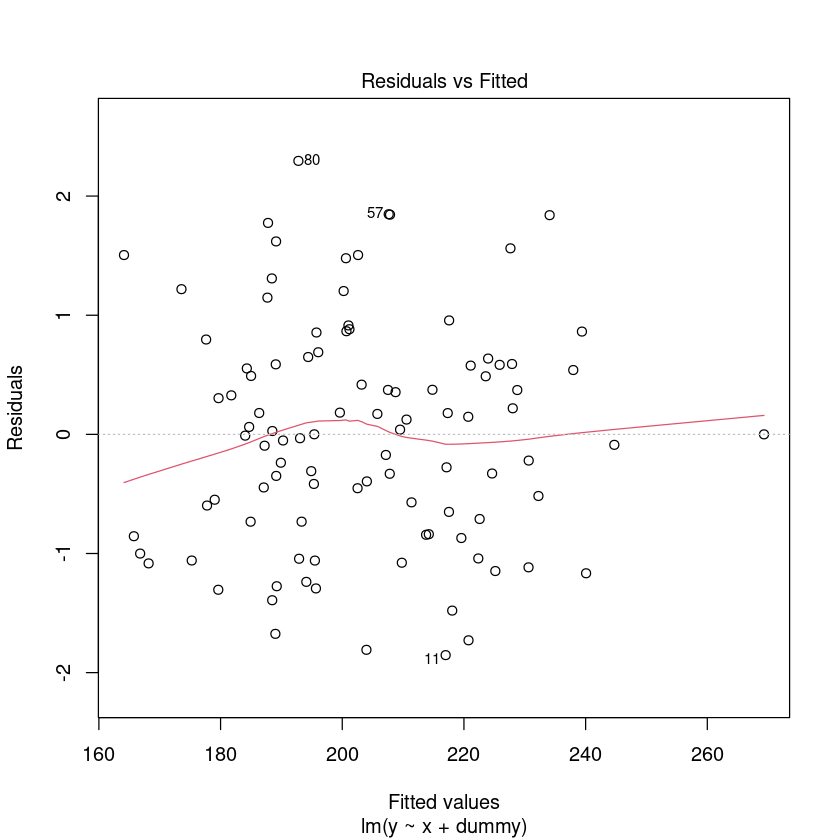

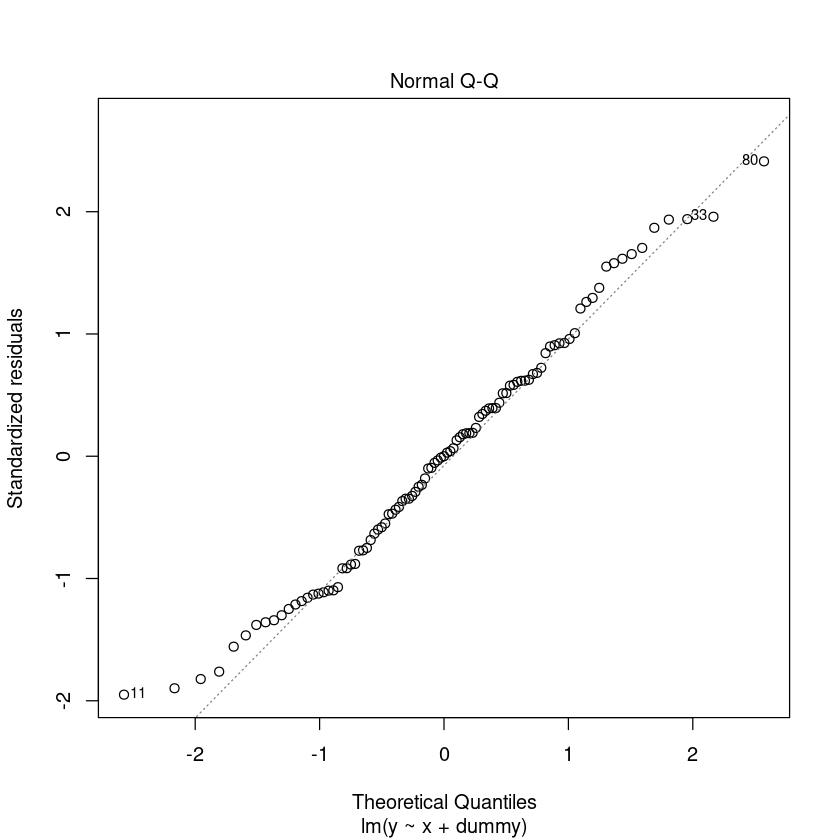

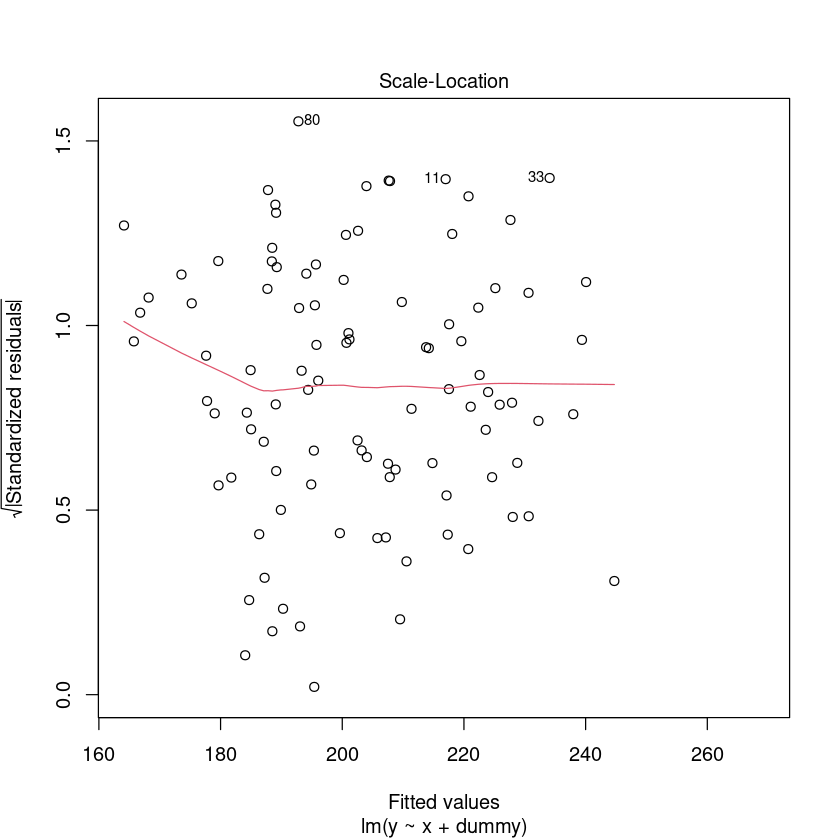

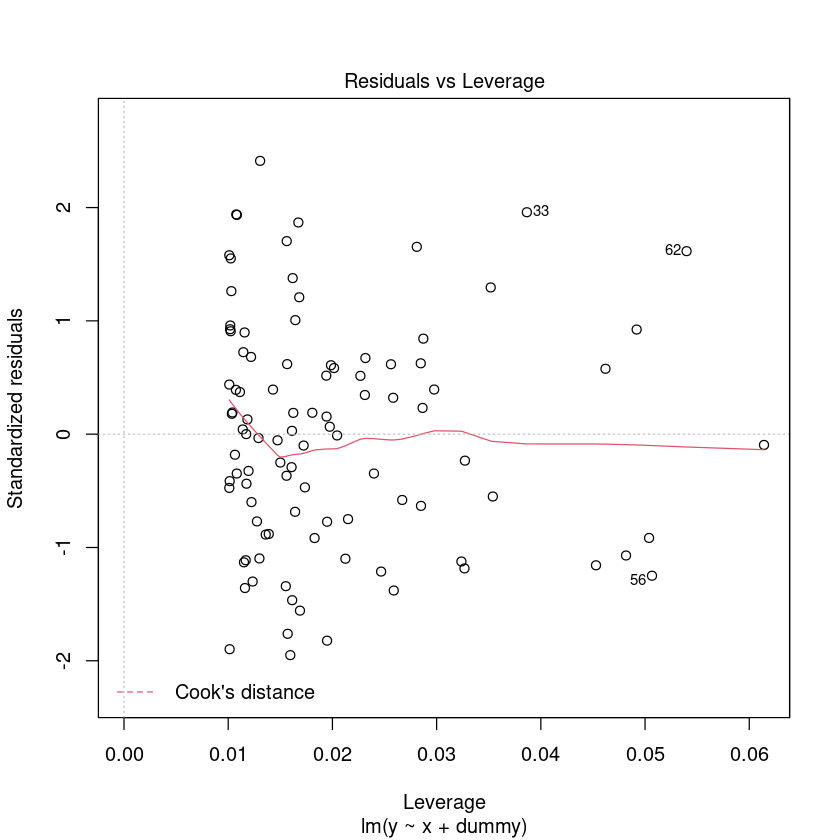

In [416]:
plot(fit.dummy)

[1] 80 11

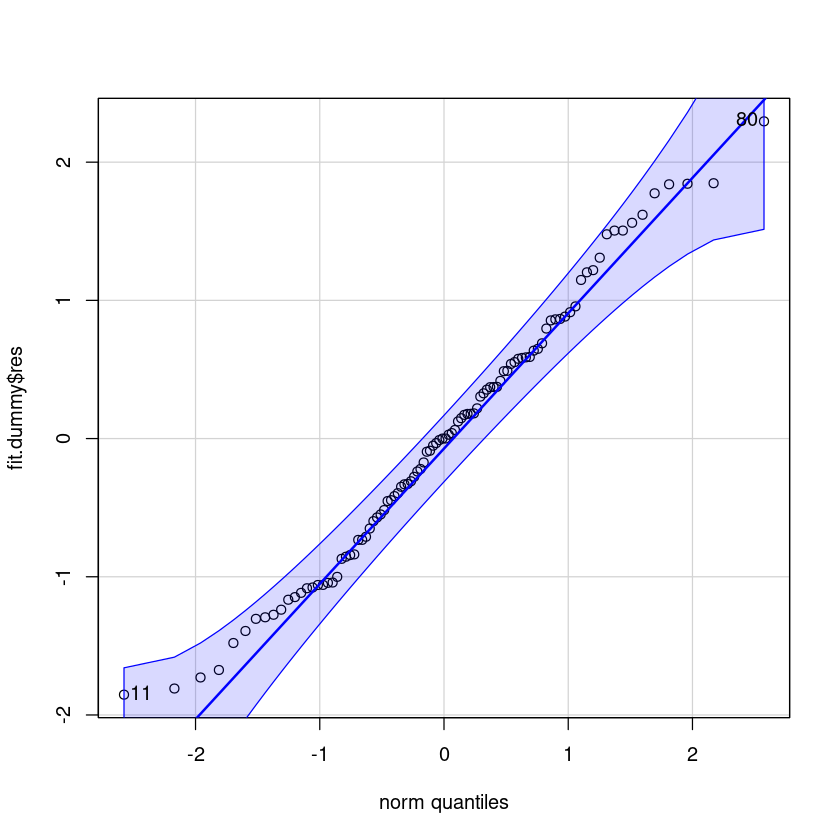

In [417]:
car::qqPlot(fit.dummy$res)

# Regressão M

In [422]:
summary(fit.robust<-MASS::rlm(y~x,data=dados.cont,method="M", psi = "psi.hampel"))


Call: rlm(formula = y ~ x, data = dados.cont, psi = "psi.hampel", method = "M")
Residuals:
     Min       1Q   Median       3Q      Max 
-1.85122 -0.72851  0.01828  0.60329 48.60741 

Coefficients:
            Value    Std. Error t value 
(Intercept)   0.8507   1.0557     0.8058
x             2.0018   0.0104   192.3036

Residual standard error: 0.9974 on 98 degrees of freedom

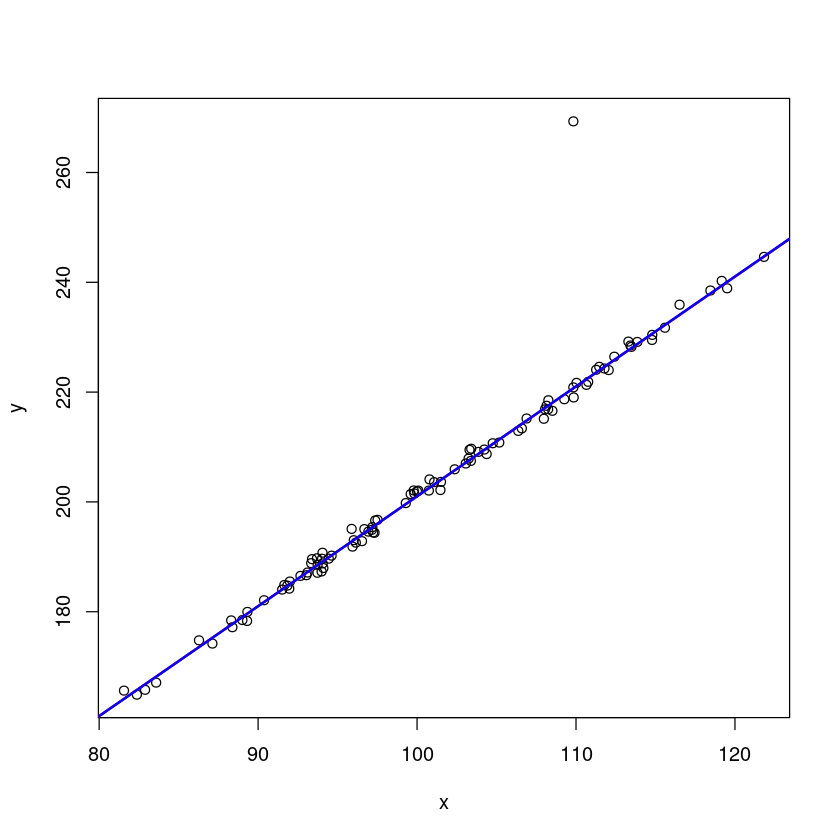

In [424]:
with(dados.cont,plot(x,y)); abline(fit, lwd=2,col="red"); abline(fit.robust, lwd=2,col="blue");

# Cenário 2.

In [425]:
set.seed(544128)

n<-100; b0<-1.0; b1<-2.0

x<-rnorm(n,100,10); x<-x[order(x)]
erro<-rnorm(n)

y<-b0+b1*x+erro


dummy <- c(rep(0,n*0.5),rep(1,n*0.5));

y.cont<-y+20*dummy

dados<-data.frame(y=y,x=x); dados.cont<-data.frame(y=y.cont,x=x)

summary(fit<-lm(y~.,data=dados)); summary(fit.cont<-lm(y~.,data=dados.cont));



Call:
lm(formula = y ~ ., data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85641 -0.76181 -0.00669  0.61754  2.32283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.26167    1.05269   1.199    0.234    
x            1.99758    0.01038 192.460   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9629 on 98 degrees of freedom
Multiple R-squared:  0.9974,	Adjusted R-squared:  0.9973 
F-statistic: 3.704e+04 on 1 and 98 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ ., data = dados.cont)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.459  -4.221  -1.011   4.469  11.825 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -80.25485    6.10842  -13.14   <2e-16 ***
x             2.90370    0.06023   48.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.587 on 98 degrees of freedom
Multiple R-squared:  0.9595,	Adjusted R-squared:  0.9591 
F-statistic:  2324 on 1 and 98 DF,  p-value: < 2.2e-16


[1] 80 97

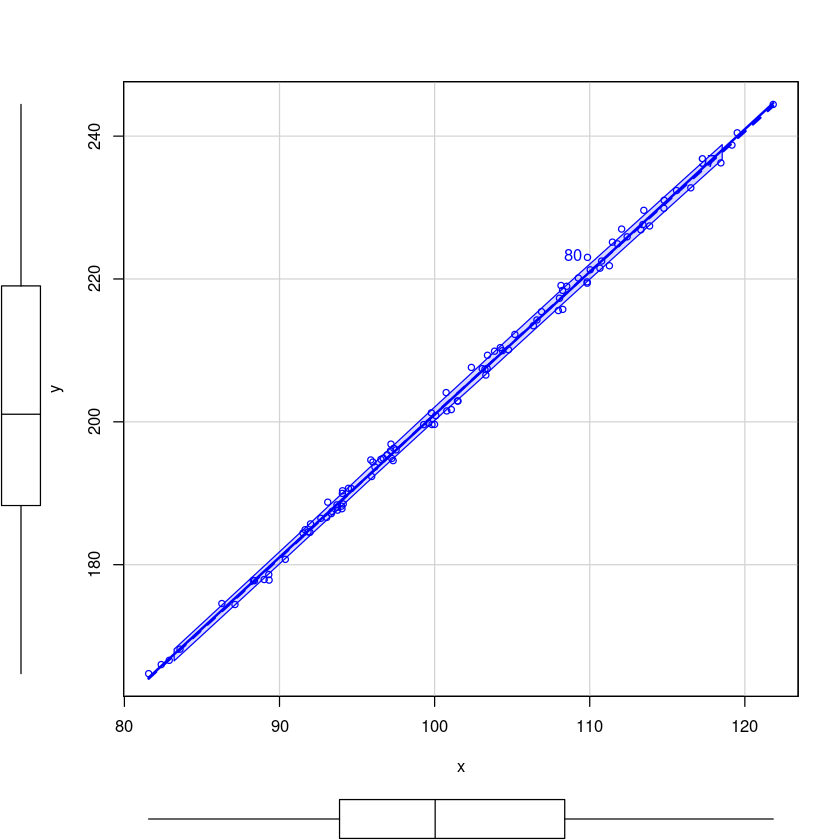

[1]   1 100

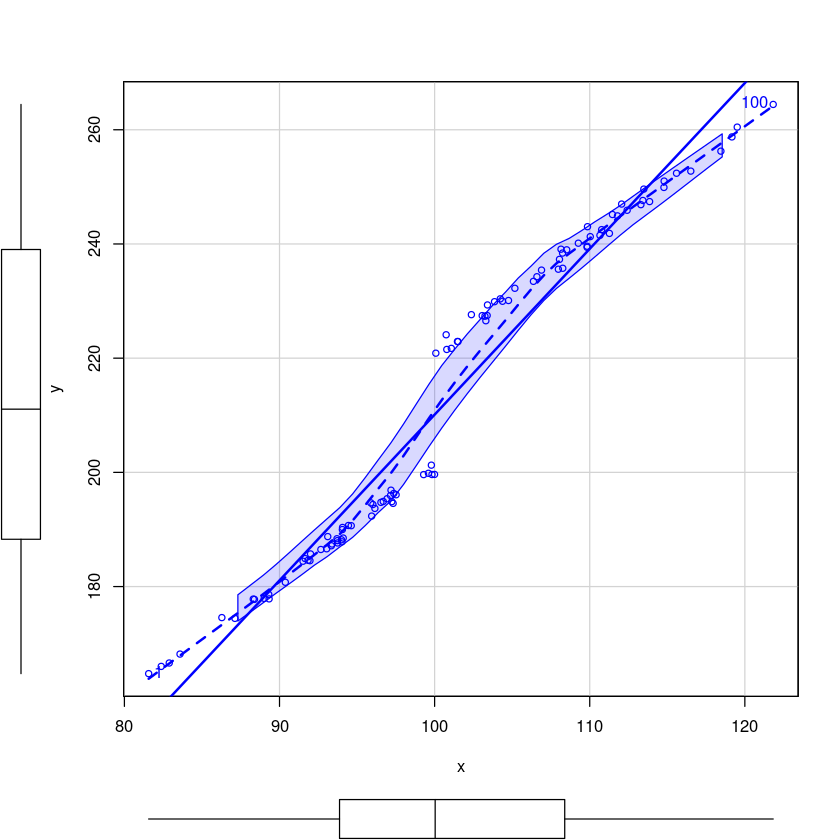

In [426]:
scatterplot(y ~ ., data=dados, id=list(n=2)); scatterplot(y ~ ., data=dados.cont, id=list(n=2))

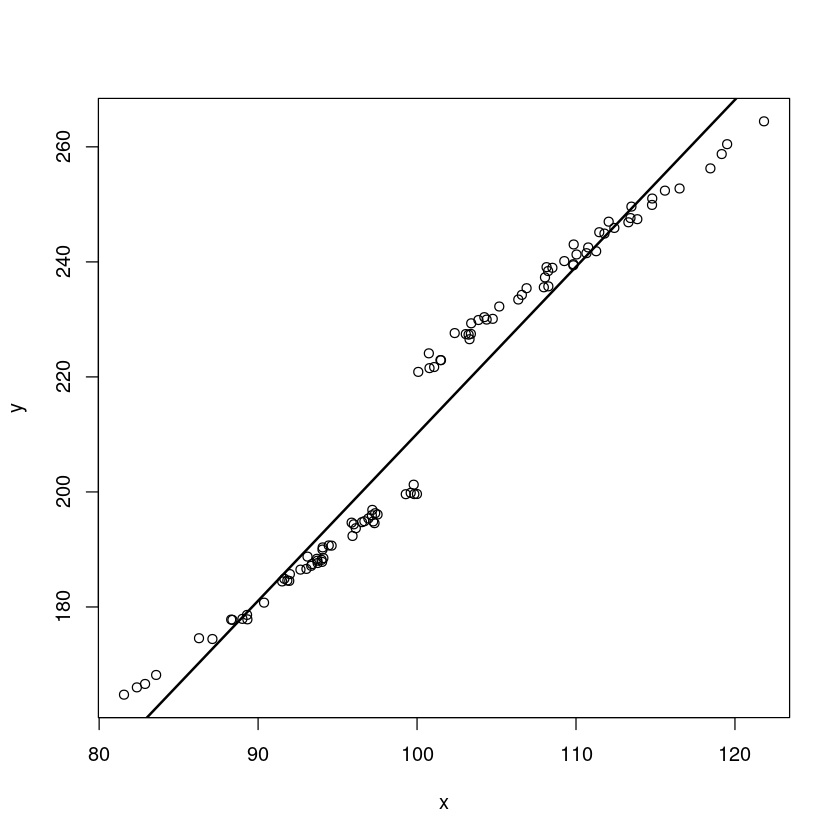

In [427]:
with(dados.cont,plot(x,y)); abline(fit.cont, lwd=2)

In [428]:
car::outlierTest(fit); car::outlierTest(fit.cont)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
80 2.500141           0.014092           NA

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
52 2.166868           0.032694           NA

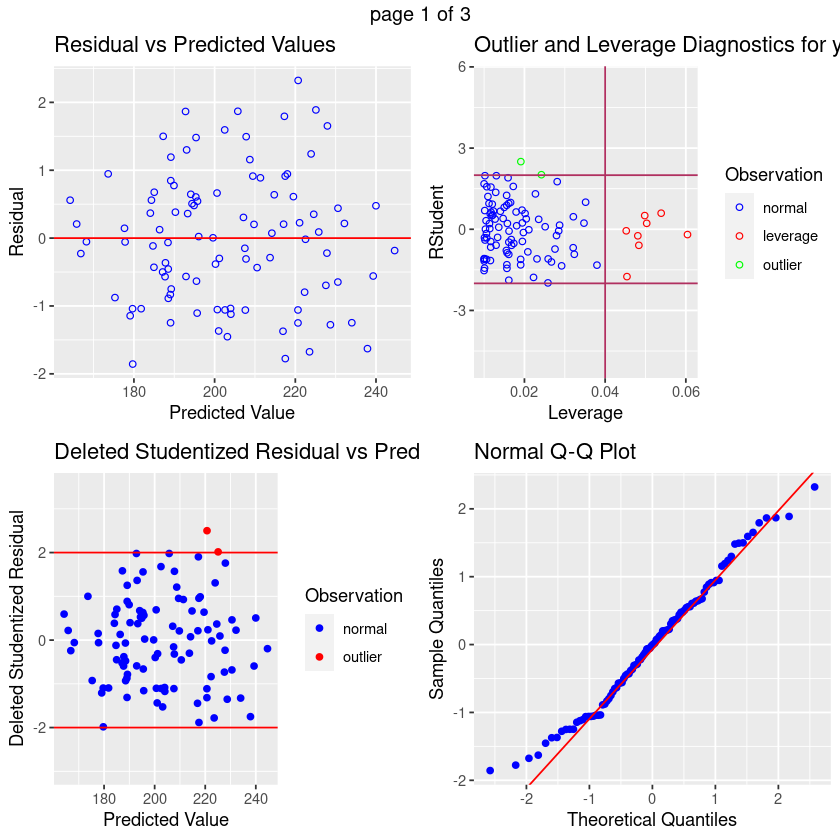

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL


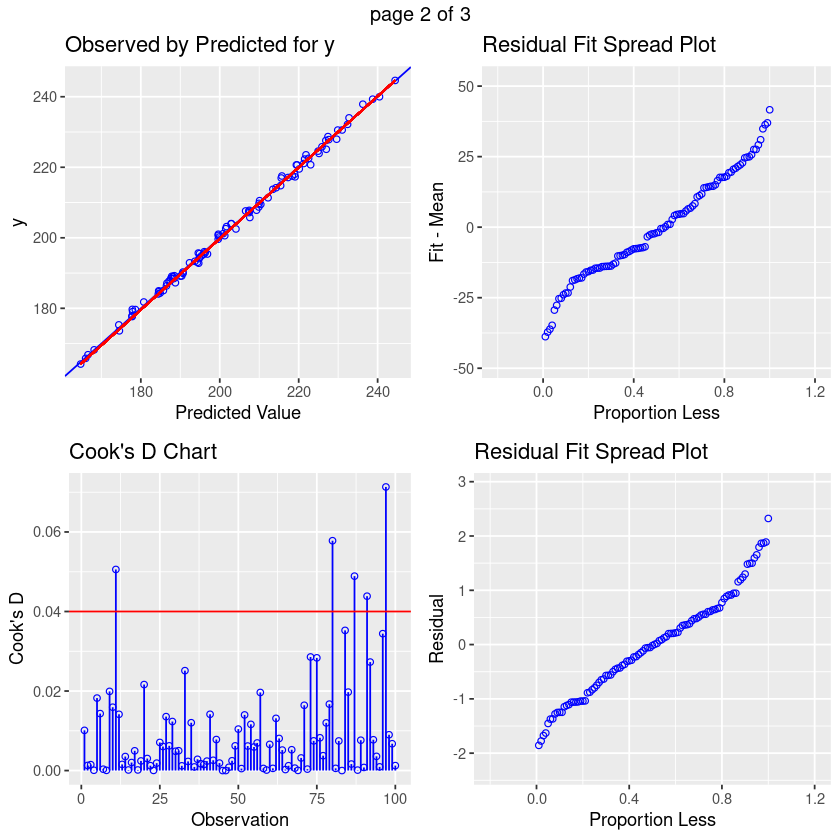

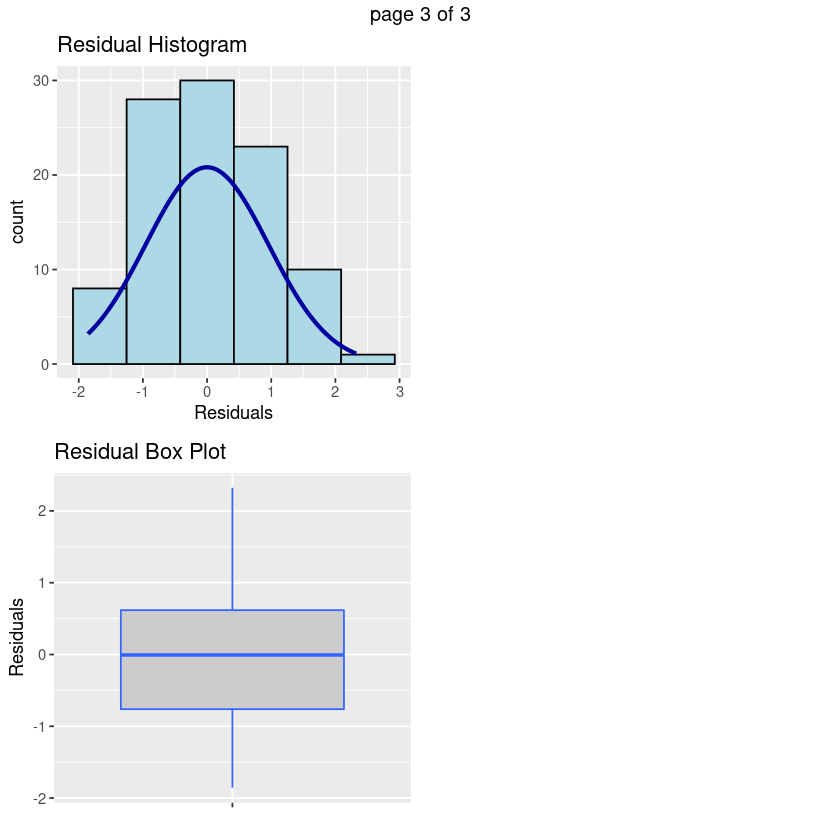

In [429]:
ols_plot_diagnostics(fit)

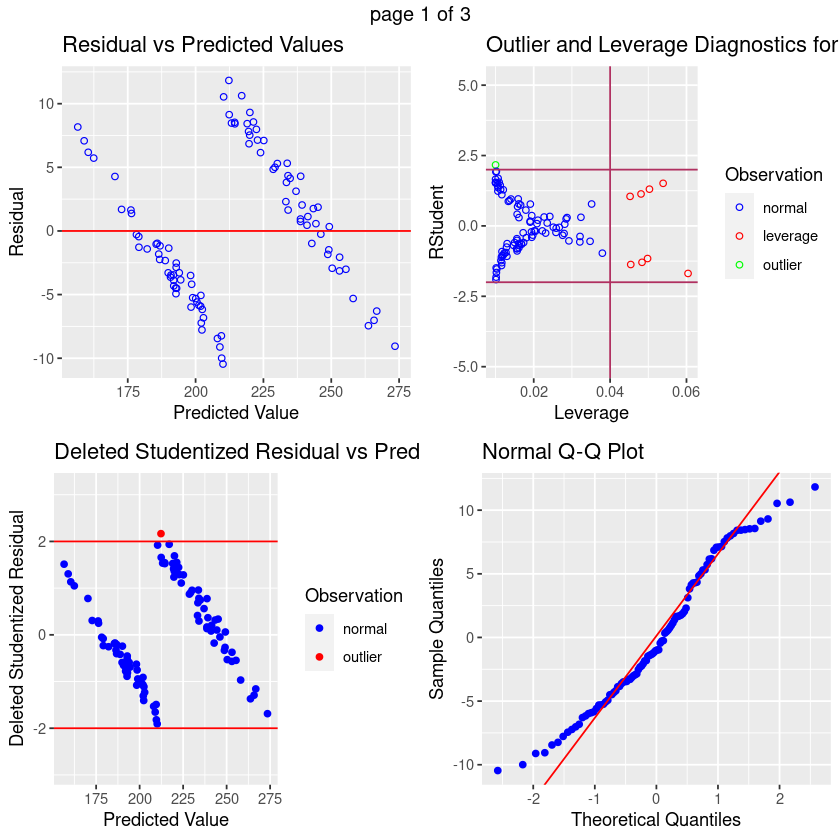

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL


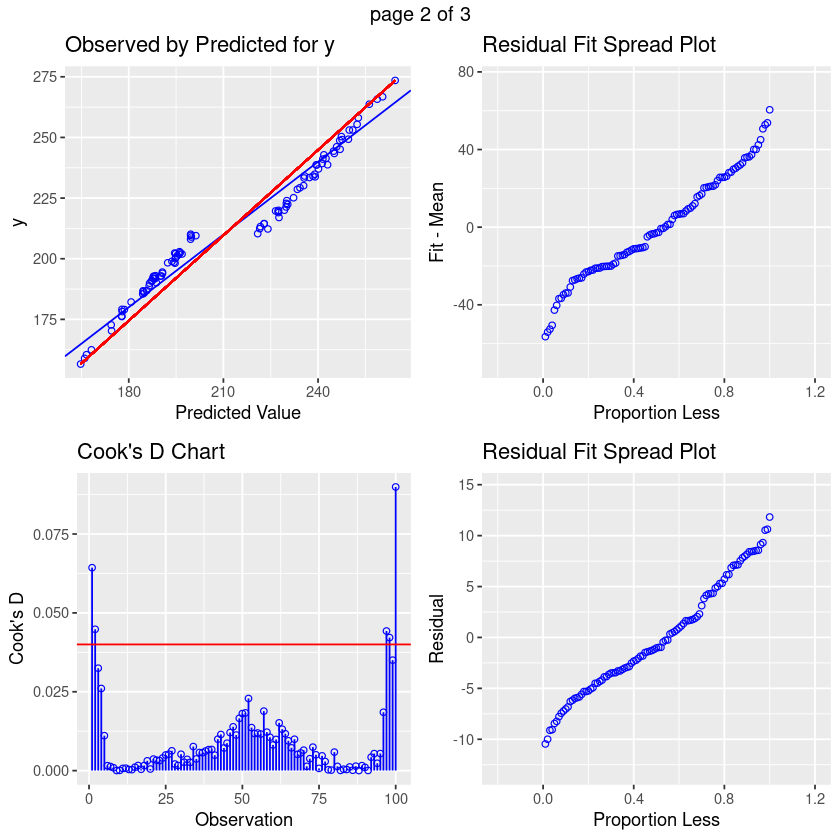

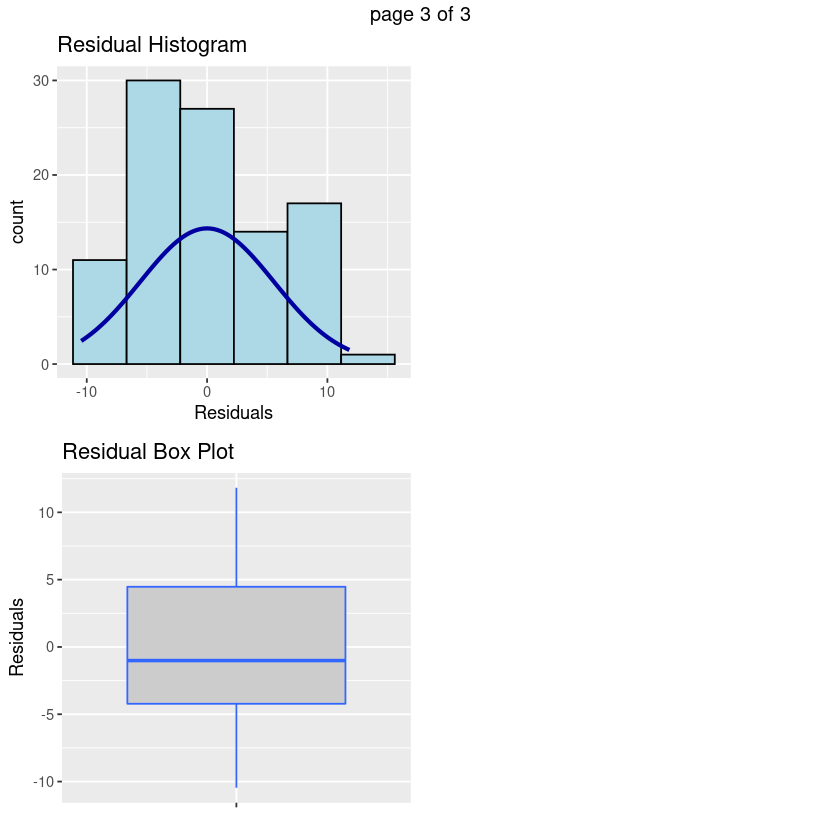

In [430]:
ols_plot_diagnostics(fit.cont)

[1]  27 741

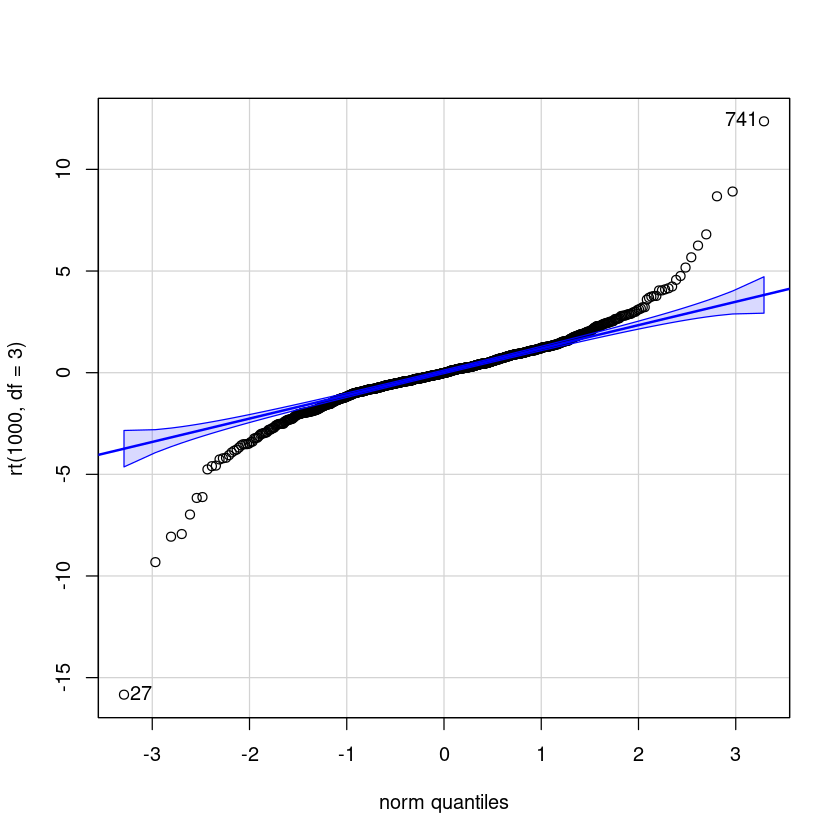

In [437]:
qqPlot(rt(1000,df=3))

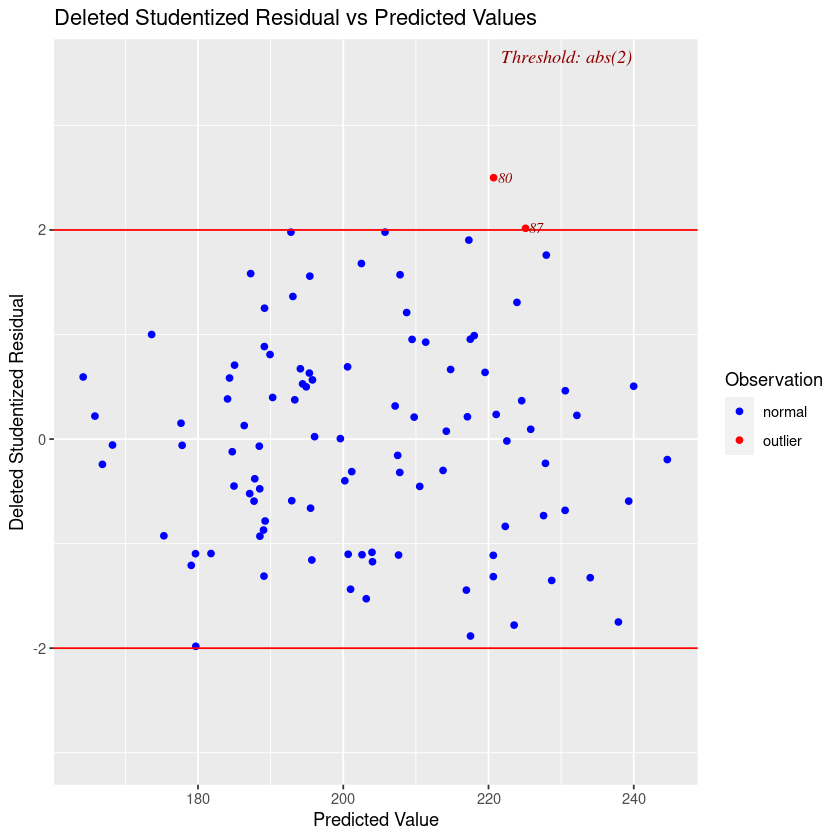

In [438]:
ols_plot_resid_stud_fit(fit)

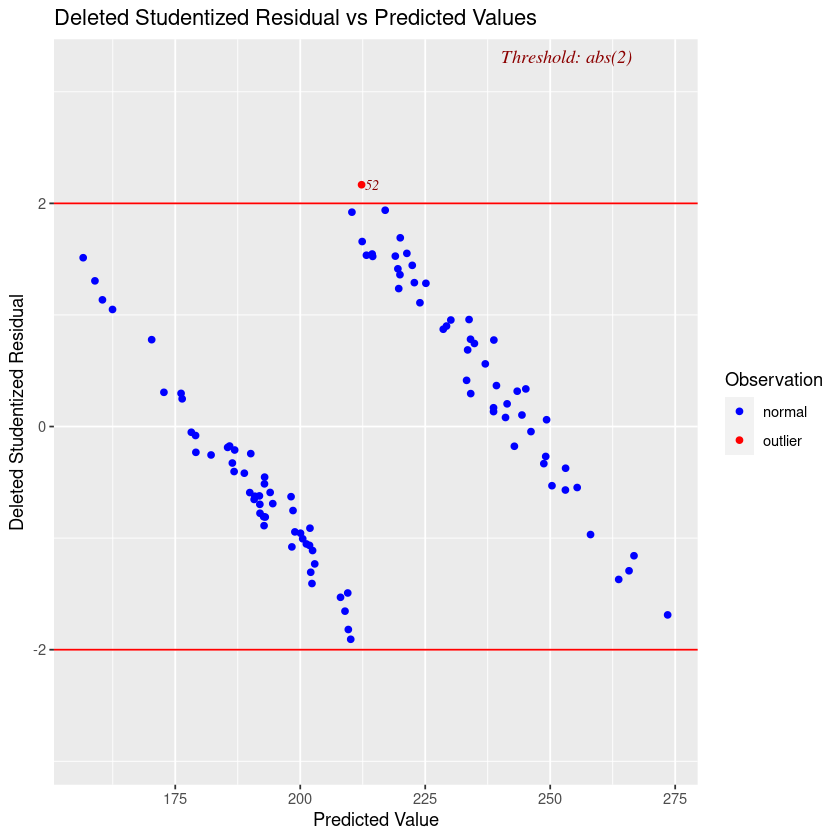

In [439]:
ols_plot_resid_stud_fit(fit.cont)

In [ ]:
ols_plot_cooksd_bar(fit)

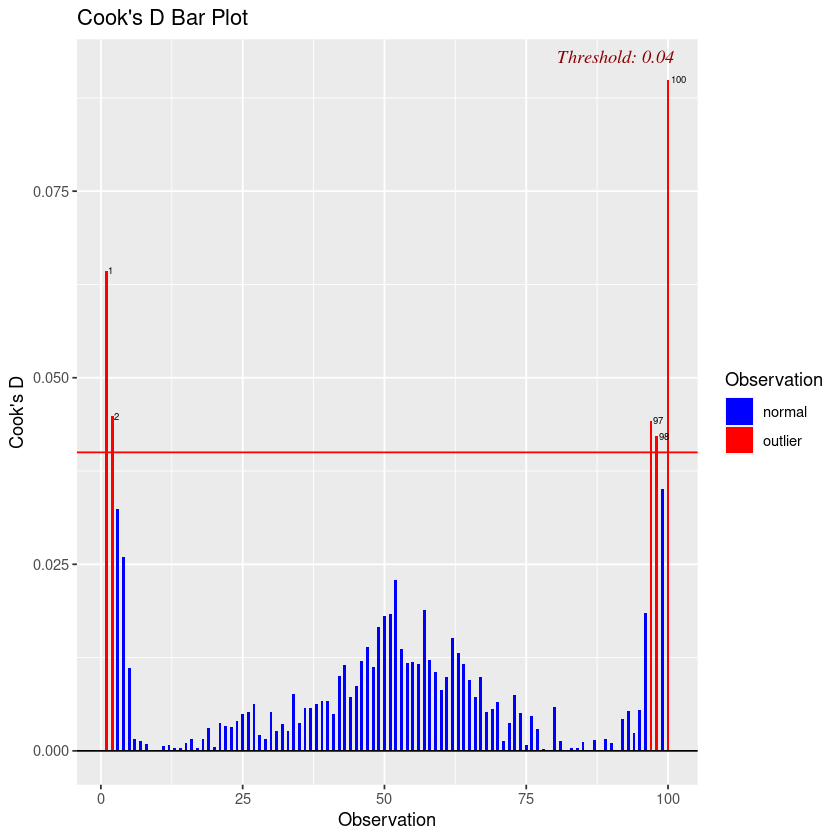

In [440]:
ols_plot_cooksd_bar(fit.cont)

In [441]:
dummy

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [442]:
summary(fit.dummy<-lm(y~x+dummy,data=dados.cont))


Call:
lm(formula = y ~ x + dummy, data = dados.cont)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85984 -0.74688  0.00922  0.61911  2.31105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.74769    1.79935   0.971    0.334    
x            1.99217    0.01925 103.486   <2e-16 ***
dummy       20.11925    0.35718  56.328   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9673 on 97 degrees of freedom
Multiple R-squared:  0.9988,	Adjusted R-squared:  0.9988 
F-statistic: 4.036e+04 on 2 and 97 DF,  p-value: < 2.2e-16


[1] 80 33

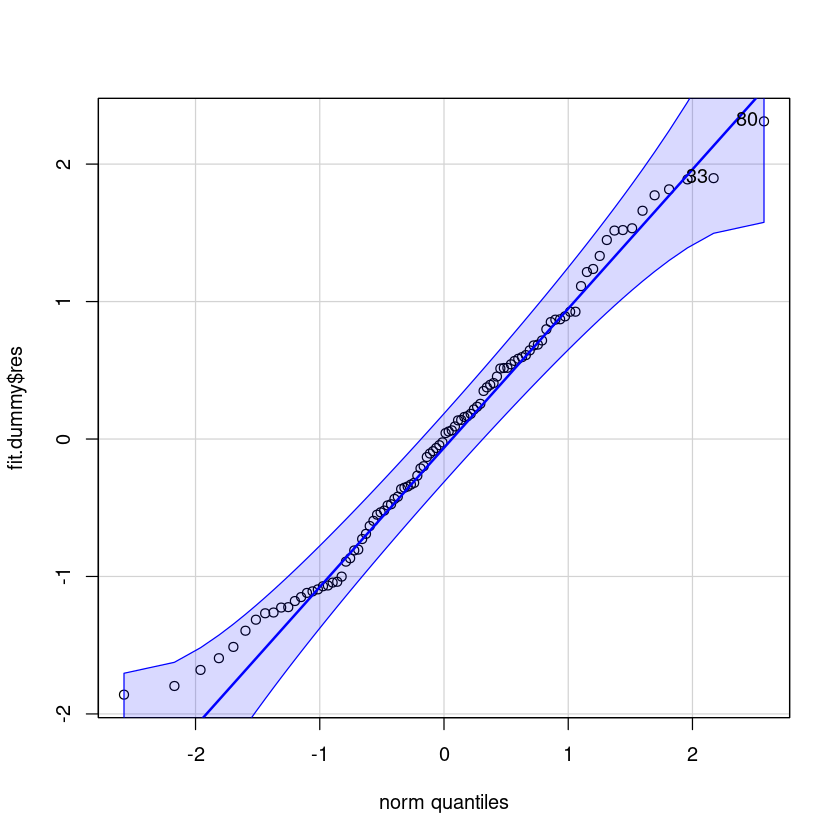

In [443]:
car::qqPlot(fit.dummy$res)

In [ ]:
plot(fit.dummy)

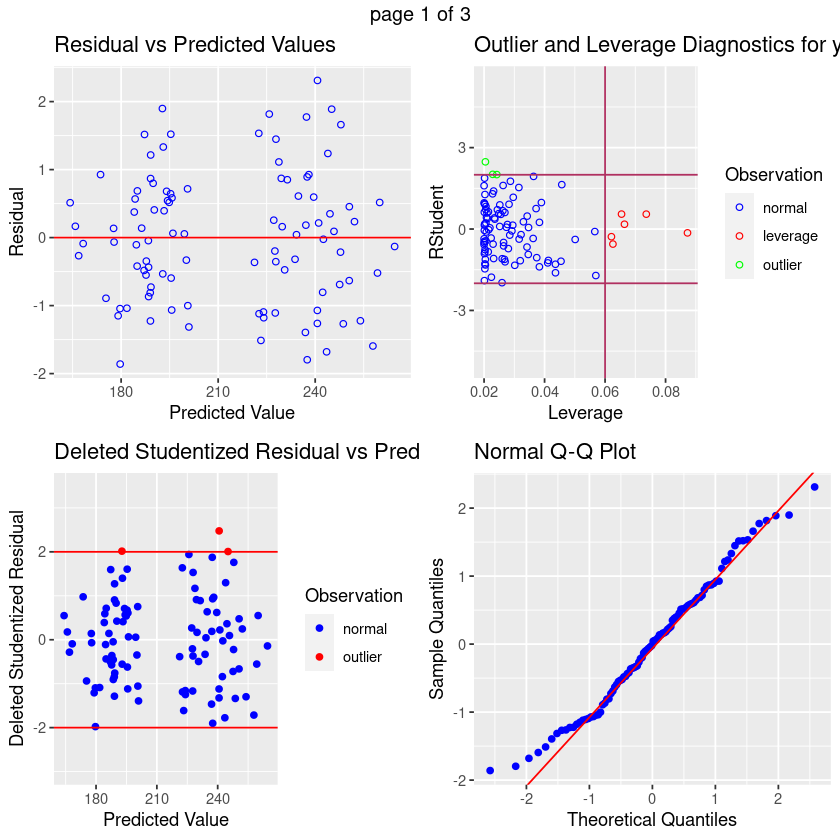

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL


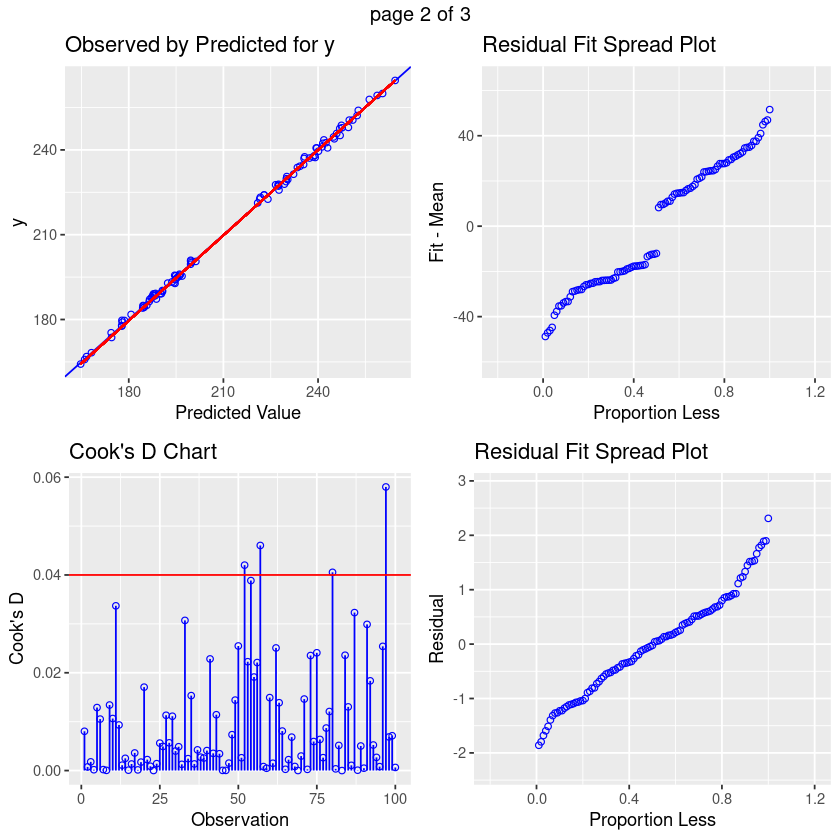

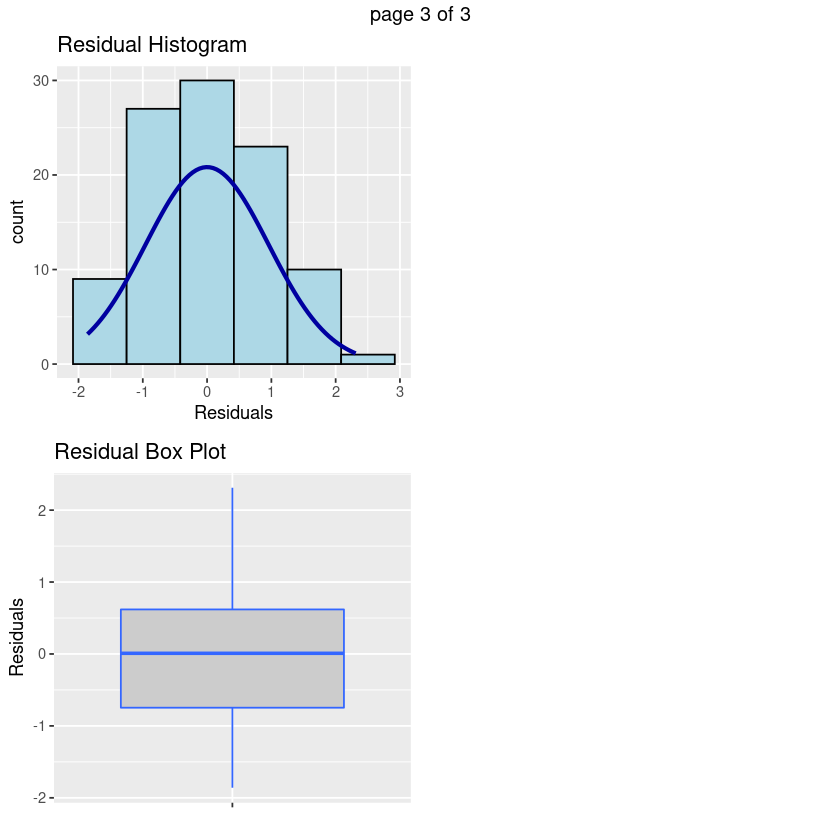

In [444]:
ols_plot_diagnostics(fit.dummy)

In [ ]:
ols_plot_resid_stud_fit(fit.dummy)

# Regressão M

In [ ]:
summary(fit.robust<-MASS::rlm(y~x,data=dados.cont,method="M", psi = "psi.huber"))

In [ ]:
acf(fit.robust$res);pacf(fit.robust$res)

# Cenário 3

In [ ]:
set.seed(544128)

n<-100; b0<-1.0; b1<-2.0

x<-cbind(rnorm(n,100,10));
erro<-rnorm(n)
erro.cont<-rchisq(n,df=2)

y<-b0+b1*x+erro
y.cont<-b0+b1*x+erro.cont


dados<-data.frame(y=y,x=x)
dados.cont<-data.frame(y=y.cont,x=x)

summary(fit<-lm(y~x,data=dados)); summary(fit.cont<-lm(y~x,data=dados.cont))

In [ ]:
scatterplot(y ~ ., data=dados, id=list(n=2)); scatterplot(y ~ ., data=dados.cont, id=list(n=2))

In [ ]:
with(dados.cont,plot(x,y)); abline(fit.cont, lwd=2)

In [ ]:
car::outlierTest(fit); car::outlierTest(fit.cont)

In [ ]:
ols_plot_diagnostics(fit)

In [ ]:
ols_plot_diagnostics(fit.cont)

In [ ]:
ols_plot_cooksd_bar(fit)

In [ ]:
ols_plot_cooksd_bar(fit.cont)

# Como criar variáveis dummies

In [ ]:
dados <- read.csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv')

In [ ]:
head(dados)

In [ ]:
dummies <- dados %>% recipe(salary ~ .) %>%
    step_dummy(sex, one_hot = TRUE) %>% 
    prep() %>% 
    bake(dados)

In [ ]:
dummies

In [ ]:
dados <- dummy_cols(dados, select_columns = 'sex'); head(dados)